# **생능 출판사 "으뜸 머신러닝"(1판) 교재의 소스 코드**
# *10장 순환신경망*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### 10.4 텐서플로를 이용하여 단순 RNN 모델 만들기

In [1]:
import numpy as np

size, seq_len = 100, 3
# 비어있는 넘파이 배열을 생성한다.
X = np.empty(shape=(size, seq_len, 1))
Y = np.empty(shape=(size,))

In [2]:
import numpy as np

size, seq_len = 100, 3
# 비어있는 넘파이 배열을 생성한다.
X = np.empty(shape=(size, seq_len, 1))
Y = np.empty(shape=(size,))

for i in range(size):
    # [0, 0.1, 0.2], [0.1, 0.2, 0.3] 같은 시퀀스를 만든다
    c = np.linspace(i/10., (i+seq_len-1)/10., seq_len)
    X[i] = c[:, np.newaxis]   # 새로운 축을 하나 더 추가함
    Y[i] = (i+seq_len) / 10   # 목표값을 생성함

for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]] 0.3
[[0.1]
 [0.2]
 [0.3]] 0.4
[[0.2]
 [0.3]
 [0.4]] 0.5
[[0.3]
 [0.4]
 [0.5]] 0.6
[[0.4]
 [0.5]
 [0.6]] 0.7
[[0.5]
 [0.6]
 [0.7]] 0.8
[[0.6]
 [0.7]
 [0.8]] 0.9
[[0.7]
 [0.8]
 [0.9]] 1.0
[[0.8]
 [0.9]
 [1. ]] 1.1
[[0.9]
 [1. ]
 [1.1]] 1.2
[[1. ]
 [1.1]
 [1.2]] 1.3
[[1.1]
 [1.2]
 [1.3]] 1.4
[[1.2]
 [1.3]
 [1.4]] 1.5
[[1.3]
 [1.4]
 [1.5]] 1.6
[[1.4]
 [1.5]
 [1.6]] 1.7
[[1.5]
 [1.6]
 [1.7]] 1.8
[[1.6]
 [1.7]
 [1.8]] 1.9
[[1.7]
 [1.8]
 [1.9]] 2.0
[[1.8]
 [1.9]
 [2. ]] 2.1
[[1.9]
 [2. ]
 [2.1]] 2.2
[[2. ]
 [2.1]
 [2.2]] 2.3
[[2.1]
 [2.2]
 [2.3]] 2.4
[[2.2]
 [2.3]
 [2.4]] 2.5
[[2.3]
 [2.4]
 [2.5]] 2.6
[[2.4]
 [2.5]
 [2.6]] 2.7
[[2.5]
 [2.6]
 [2.7]] 2.8
[[2.6]
 [2.7]
 [2.8]] 2.9
[[2.7]
 [2.8]
 [2.9]] 3.0
[[2.8]
 [2.9]
 [3. ]] 3.1
[[2.9]
 [3. ]
 [3.1]] 3.2
[[3. ]
 [3.1]
 [3.2]] 3.3
[[3.1]
 [3.2]
 [3.3]] 3.4
[[3.2]
 [3.3]
 [3.4]] 3.5
[[3.3]
 [3.4]
 [3.5]] 3.6
[[3.4]
 [3.5]
 [3.6]] 3.7
[[3.5]
 [3.6]
 [3.7]] 3.8
[[3.6]
 [3.7]
 [3.8]] 3.9
[[3.7]
 [3.8]
 [3.9]] 4.0
[[3.8]
 [3.9

In [3]:
import tensorflow as tf
# units는 SimpleRNN 레이어에 있는 뉴런의 수
# return_sequences는 출력으로 시퀀스 전체를 출력할지 묻는 옵션
# input_shape [3, 1]에서 3는 timesteps, 1은 입력차원
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 20, return_sequences=False,
                              input_shape=[3, 1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer ='adam', loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 20)                440       
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


### 10.5 RNN을 학습시켜 예측을 해 보자.

In [4]:
import matplotlib.pyplot as plt
history = model.fit(X, Y, epochs=300)


Epoch 1/300
4/4 [==============================] - 1s 4ms/step - loss: 31.3858
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 29.5950
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 25.0485
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 23.3995
Epoch 5/300
4/4 [==============================] - 0s 4ms/step - loss: 23.5803
Epoch 6/300
4/4 [==============================] - 0s 5ms/step - loss: 21.6299
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 19.2852
Epoch 8/300
4/4 [==============================] - 0s 4ms/step - loss: 19.2898
Epoch 9/300
4/4 [==============================] - 0s 4ms/step - loss: 16.6353
Epoch 10/300
4/4 [==============================] - 0s 4ms/step - loss: 15.7262
Epoch 11/300
4/4 [==============================] - 0s 6ms/step - loss: 13.6023
Epoch 12/300
4/4 [==============================] - 0s 4ms/step - loss: 12.2772
Epoch 13/300
4/4 [==============================]

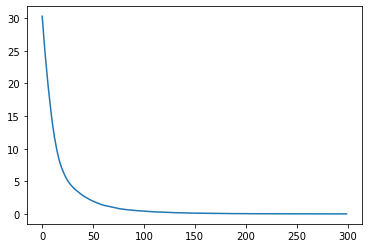

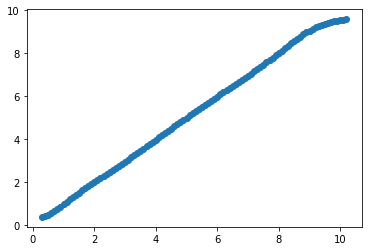

In [5]:
plt.plot(history.history['loss'])
plt.show()
y_hat = model.predict(X)
plt.scatter(Y, y_hat)
plt.show()

In [6]:
print(model.predict(np.array([[[10.2], [10.3], [10.4]]])))
print(model.predict(np.array([[[10.4], [10.5], [10.6]]])))

[[9.63176]]
[[9.651968]]


In [8]:
# 유닛의 수를 256개로 대폭 늘여서 개선된 모델
model256 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 256, return_sequences=False,
                              input_shape=[3, 1]),
    tf.keras.layers.Dense(1)
])

model256.compile(optimizer ='adam', loss = 'mse')
model256.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 256)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 66,305
Trainable params: 66,305
Non-trainable params: 0
_________________________________________________________________


Epoch 1/300
4/4 [==============================] - 1s 7ms/step - loss: 32.9013
Epoch 2/300
4/4 [==============================] - 0s 5ms/step - loss: 3.5916
Epoch 3/300
4/4 [==============================] - 0s 5ms/step - loss: 5.2051
Epoch 4/300
4/4 [==============================] - 0s 5ms/step - loss: 2.2597
Epoch 5/300
4/4 [==============================] - 0s 7ms/step - loss: 2.3062
Epoch 6/300
4/4 [==============================] - 0s 5ms/step - loss: 1.2301
Epoch 7/300
4/4 [==============================] - 0s 5ms/step - loss: 1.6318
Epoch 8/300
4/4 [==============================] - 0s 5ms/step - loss: 0.4956
Epoch 9/300
4/4 [==============================] - 0s 5ms/step - loss: 0.7021
Epoch 10/300
4/4 [==============================] - 0s 5ms/step - loss: 0.3045
Epoch 11/300
4/4 [==============================] - 0s 5ms/step - loss: 0.2739
Epoch 12/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2030
Epoch 13/300
4/4 [==============================] - 0s 5ms/s

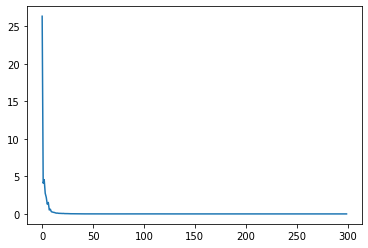

In [9]:
history = model256.fit(X, Y, epochs=300)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

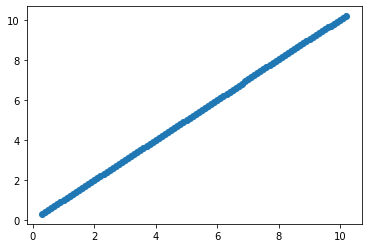

In [ ]:
y_hat = model256.predict(X)
plt.scatter(Y, y_hat)

In [10]:
print(model256.predict(np.array([[[10.2], [10.3], [10.4]]])))
print(model256.predict(np.array([[[10.4], [10.5], [10.6]]])))

[[10.404442]]
[[10.573817]]


### 10.6 RNN을 다층구조로 만들어 적은 수의 파라미터로 좋은 성능을 내자

In [12]:
import tensorflow as tf

model_multilayer = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 34, input_shape=[3, 1],
                                          return_sequences=True),
    tf.keras.layers.SimpleRNN(units = 34, return_sequences=True),
    tf.keras.layers.SimpleRNN(units = 34, return_sequences=True),
    tf.keras.layers.SimpleRNN(units = 34),
    tf.keras.layers.Dense(1) ])
model_multilayer.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 3, 34)             1224      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 3, 34)             2346      
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 3, 34)             2346      
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, 34)                2346      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 35        
Total params: 8,297
Trainable params: 8,297
Non-trainable params: 0
_________________________________________________________________


Epoch 1/300
4/4 [==============================] - 2s 6ms/step - loss: 28.7875
Epoch 2/300
4/4 [==============================] - 0s 5ms/step - loss: 13.2913
Epoch 3/300
4/4 [==============================] - 0s 6ms/step - loss: 9.2524
Epoch 4/300
4/4 [==============================] - 0s 6ms/step - loss: 7.0078
Epoch 5/300
4/4 [==============================] - 0s 5ms/step - loss: 5.8872
Epoch 6/300
4/4 [==============================] - 0s 5ms/step - loss: 5.3175
Epoch 7/300
4/4 [==============================] - 0s 5ms/step - loss: 4.7810
Epoch 8/300
4/4 [==============================] - 0s 5ms/step - loss: 4.1072
Epoch 9/300
4/4 [==============================] - 0s 5ms/step - loss: 3.2379
Epoch 10/300
4/4 [==============================] - 0s 6ms/step - loss: 2.7599
Epoch 11/300
4/4 [==============================] - 0s 6ms/step - loss: 2.2553
Epoch 12/300
4/4 [==============================] - 0s 5ms/step - loss: 2.1855
Epoch 13/300
4/4 [==============================] - 0s 5ms/

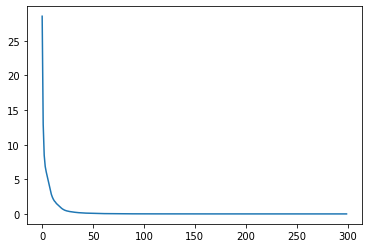

In [13]:
model_multilayer.compile(optimizer ='adam', loss = 'mse')
history = model_multilayer.fit(X, Y, epochs=300)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

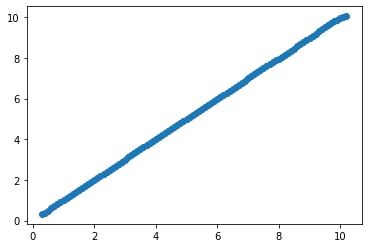

In [15]:
y_hat = model_multilayer.predict(X)
plt.scatter(Y, y_hat)

In [14]:
print(model_multilayer.predict(np.array([[[10.2], [10.3], [10.4]]])))
print(model_multilayer.predict(np.array([[[10.4], [10.5], [10.6]]])))

[[10.1562605]]
[[10.198745]]


### 10.12 단순 RNN과 LSTM, GRU 모델의 비교 (1) - 시퀀스 데이터 준비

In [16]:
import numpy as np

# 0.0, 0.1, .. 증가하는 시퀀스 데이터를 생성함
# seq_len 길이를 가지는 시퀀스 데이터를 size 갯수만큼 생성한다
def sequence_gen(size, seq_len):
    # 비어있는 넘파이 배열을 생성한다.
    seq_X = np.empty(shape=(size, seq_len, 1))
    Y = np.empty(shape=(size,))

    for i in range(size):
        # [0, 0.1, 0.2, .. ]같은 시퀀스와 Y 값을 size 갯수만큼 생성
        c = np.linspace(i/10, (i+seq_len-1)/10, seq_len)
        seq_X[i] = c[:, np.newaxis]   # 새로운 축을 하나 더 추가함
        Y[i] = (i+seq_len) / 10       # 목표값을 생성함

    return seq_X, Y

# 길이가 16인 시퀀스 8개를 훈련용으로 만든다
n, seq_len = 8, 16   
train_seq_X, train_Y = sequence_gen(n, seq_len)

In [ ]:
print('훈련용 데이터')
for i in range(n):
    print(train_seq_X[i].flatten(), train_Y[i])

half_n, offset = int(n/2), 1.0
test_seq_X = train_seq_X[:half_n] + offset
test_Y = train_Y[:half_n] + offset

print('검증용 데이터')
for i in range(half_n):
    print(test_seq_X[i].flatten(), test_Y[i])

훈련용 데이터
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5] 1.6
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6] 1.7
[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7] 1.8
[0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8] 1.9
[0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9] 2.0
[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ] 2.1
[0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1] 2.2
[0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2] 2.3
검증용 데이터
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5] 2.6
[1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6] 2.7
[1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7] 2.8
[1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8] 2.9


### 10.13 단순 RNN과 LSTM, GRU 모델의 비교 (1) - 성능 비교

In [ ]:
import tensorflow as tf
n_units = 256
simpleRNN_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = n_units, return_sequences=False,
                              input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

simpleRNN_model.compile(optimizer ='adam', loss = 'mse')
simpleRNN_model.fit(train_seq_X, train_Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 616ms/step - loss: 2.7892
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0164
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 0.5605
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 0.1056
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 0.2320
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2680
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0375
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0482
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 0.1495
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 0.1180
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0261
Epoch 12/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0163
Epoch 13/100
1/1 [==============================] 

In [ ]:
result = simpleRNN_model.predict(test_seq_X)
result = result.flatten()
print('예측값 :', result)
print('실제값 :', test_Y)

예측값 : [2.4326103 2.475918  2.513794  2.5469406]
실제값 : [2.6 2.7 2.8 2.9]


In [ ]:
LSTM_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = n_units, return_sequences=False,
                         input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

LSTM_model.compile(optimizer ='adam', loss = 'mse')
LSTM_model.fit(train_seq_X, train_Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 3.7944
Epoch 2/100
1/1 [==============================] - 0s 36ms/step - loss: 2.6660
Epoch 3/100
1/1 [==============================] - 0s 35ms/step - loss: 1.6851
Epoch 4/100
1/1 [==============================] - 0s 33ms/step - loss: 0.8327
Epoch 5/100
1/1 [==============================] - 0s 33ms/step - loss: 0.1919
Epoch 6/100
1/1 [==============================] - 0s 33ms/step - loss: 0.0724
Epoch 7/100
1/1 [==============================] - 0s 34ms/step - loss: 0.5566
Epoch 8/100
1/1 [==============================] - 0s 37ms/step - loss: 0.4381
Epoch 9/100
1/1 [==============================] - 0s 35ms/step - loss: 0.1424
Epoch 10/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0137
Epoch 11/100
1/1 [==============================] - 0s 35ms/step - loss: 0.0304
Epoch 12/100
1/1 [==============================] - 0s 36ms/step - loss: 0.0985
Epoch 13/100
1/1 [==============================] -

In [ ]:
result = LSTM_model.predict(test_seq_X)
result = result.flatten()
print('예측값 :', result)
print('실제값 :', test_Y)

예측값 : [2.5740693 2.659125  2.74145   2.821102 ]
실제값 : [2.6 2.7 2.8 2.9]


In [ ]:
GRU_model = tf.keras.Sequential([
    tf.keras.layers.GRU(units = n_units, return_sequences=False, 
                        input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

GRU_model.compile(optimizer ='adam', loss = 'mse')
GRU_model.fit(train_seq_X, train_Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 3.5505
Epoch 2/100
1/1 [==============================] - 0s 42ms/step - loss: 2.5713
Epoch 3/100
1/1 [==============================] - 0s 36ms/step - loss: 1.7387
Epoch 4/100
1/1 [==============================] - 0s 29ms/step - loss: 1.0454
Epoch 5/100
1/1 [==============================] - 0s 24ms/step - loss: 0.4985
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 0.1285
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 0.0018
Epoch 8/100
1/1 [==============================] - 0s 26ms/step - loss: 0.1716
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 0.3721
Epoch 10/100
1/1 [==============================] - 0s 26ms/step - loss: 0.3539
Epoch 11/100
1/1 [==============================] - 0s 29ms/step - loss: 0.2186
Epoch 12/100
1/1 [==============================] - 0s 27ms/step - loss: 0.0924
Epoch 13/100
1/1 [==============================] -

In [ ]:
result = GRU_model.predict(test_seq_X)
result = result.flatten()
print('예측값 :', result)
print('실제값 :', test_Y)

예측값 : [2.582737  2.6772978 2.7712963 2.864722 ]
실제값 : [2.6 2.7 2.8 2.9]


### LAB 10-1 비선형 시퀀스를 순환신경망으로 예측하자

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

size, seq_len = 100, 10
# 비어있는 넘파이 배열을 생성한다.
seq_X = np.empty(shape=(size, seq_len, 1))
Y = np.empty(shape=(size,))

In [ ]:
# sine 곡선에서 잘라낼 구간 설정
interval = np.linspace(0.0, 2.5, seq_len+1)

In [ ]:
shift = np.random.randn(size) # 시퀀스 추출에 사용할 구간을 옮겨 놓는 값
for i in range(size):
    seq_X[i,:,:] = np.sin(shift[i] + interval[:-1]).reshape(seq_len, 1)
    Y[i] = np.sin(shift[i] + interval[-1])

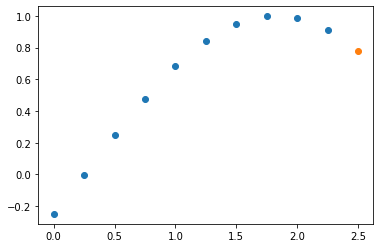

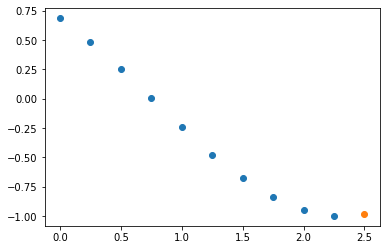

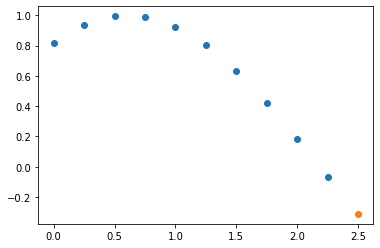

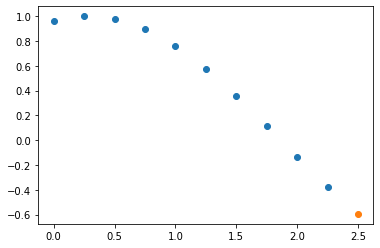

In [ ]:
for i in [1, 3, 5, 9]:
    plt.scatter(interval[:-1], seq_X[i, :,:])
    plt.scatter(interval[-1], Y[i])
    plt.show()

In [ ]:
train_X = seq_X[:80]
train_y = Y[:80]
test_X = seq_X[80:]
test_y = Y[80:]

In [ ]:
import tensorflow as tf
simpleRNN_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 10, return_sequences=False,
                              input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])
simpleRNN_model.compile(optimizer ='adam', loss = 'mse')
simpleRNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
3/3 [==============================] - 1s 4ms/step - loss: 0.7361
Epoch 2/50
3/3 [==============================] - 0s 3ms/step - loss: 0.6803
Epoch 3/50
3/3 [==============================] - 0s 3ms/step - loss: 0.6147
Epoch 4/50
3/3 [==============================] - 0s 4ms/step - loss: 0.5187
Epoch 5/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4536
Epoch 6/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4074
Epoch 7/50
3/3 [==============================] - 0s 3ms/step - loss: 0.3755
Epoch 8/50
3/3 [==============================] - 0s 3ms/step - loss: 0.2971
Epoch 9/50
3/3 [==============================] - 0s 4ms/step - loss: 0.2553
Epoch 10/50
3/3 [==============================] - 0s 4ms/step - loss: 0.2067
Epoch 11/50
3/3 [==============================] - 0s 4ms/step - loss: 0.1762
Epoch 12/50
3/3 [==============================] - 0s 4ms/step - loss: 0.1456
Epoch 13/50
3/3 [==============================] - 0s 3ms/step - loss: 0.

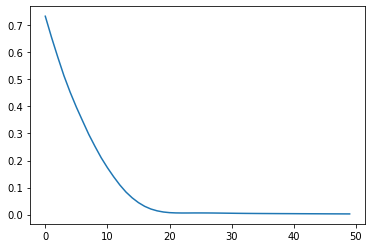

In [ ]:
history = simpleRNN_model.fit(train_X, train_y, epochs=50)
plt.plot(history.history['loss'])

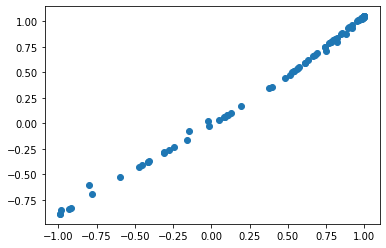

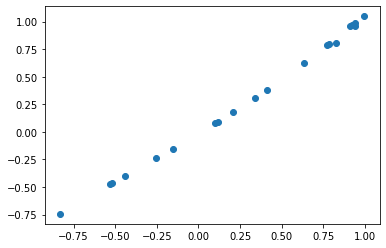

In [ ]:
train_y_hat = simpleRNN_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = simpleRNN_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

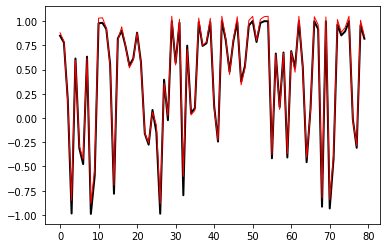

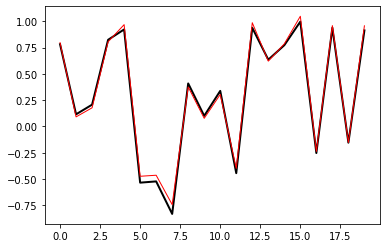

In [ ]:
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)
plt.show()

In [ ]:
LSTM_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 10, return_sequences=False,
                         input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

LSTM_model.compile(optimizer ='adam', loss = 'mse')
LSTM_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
3/3 [==============================] - 1s 6ms/step - loss: 0.7527
Epoch 2/50
3/3 [==============================] - 0s 7ms/step - loss: 0.7520
Epoch 3/50
3/3 [==============================] - 0s 5ms/step - loss: 0.6950
Epoch 4/50
3/3 [==============================] - 0s 5ms/step - loss: 0.7162
Epoch 5/50
3/3 [==============================] - 0s 5ms/step - loss: 0.6172
Epoch 6/50
3/3 [==============================] - 0s 7ms/step - loss: 0.5990
Epoch 7/50
3/3 [==============================] - 0s 5ms/step - loss: 0.6145
Epoch 8/50
3/3 [==============================] - 0s 5ms/step - loss: 0.5828
Epoch 9/50
3/3 [==============================] - 0s 5ms/step - loss: 0.5454
Epoch 10/50
3/3 [==============================] - 0s 4ms/step - loss: 0.5246
Epoch 11/50
3/3 [==============================] - 0s 4ms/step - loss: 0.4915
Epoch 12/50
3/3 [==============================] - 0s 6ms/step - loss: 0.4842
Epoch 13/50
3/3 [==============================] - 0s 5ms/step - loss: 0.

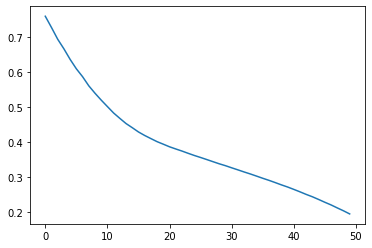

In [ ]:
history = LSTM_model.fit(train_X, train_y, epochs=50)
plt.plot(history.history['loss'])

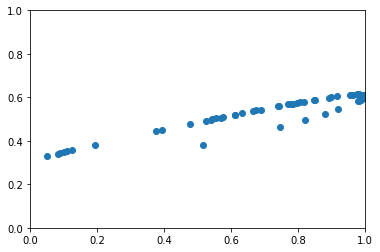

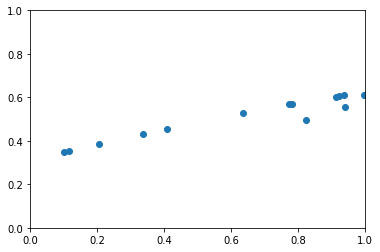

In [ ]:
train_y_hat = LSTM_model.predict(train_X)
plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(train_y, train_y_hat)
plt.show()
plt.xlim([0,1])
plt.ylim([0,1])
test_y_hat = LSTM_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

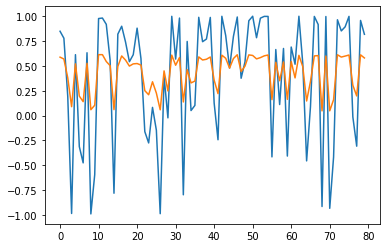

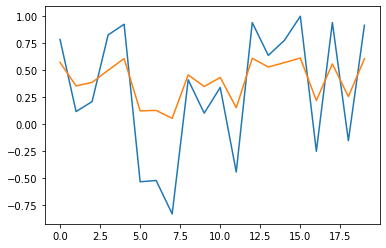

In [ ]:
plt.plot(train_y)
plt.plot(train_y_hat)
plt.show()
plt.plot(test_y)
plt.plot(test_y_hat)

In [ ]:
GRU_model = tf.keras.Sequential([
    tf.keras.layers.GRU(units = 10, return_sequences=False, 
                        input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

Epoch 1/50
3/3 [==============================] - 2s 6ms/step - loss: 0.2969
Epoch 2/50
3/3 [==============================] - 0s 5ms/step - loss: 0.2849
Epoch 3/50
3/3 [==============================] - 0s 6ms/step - loss: 0.2693
Epoch 4/50
3/3 [==============================] - 0s 5ms/step - loss: 0.2525
Epoch 5/50
3/3 [==============================] - 0s 5ms/step - loss: 0.2368
Epoch 6/50
3/3 [==============================] - 0s 5ms/step - loss: 0.2279
Epoch 7/50
3/3 [==============================] - 0s 5ms/step - loss: 0.2185
Epoch 8/50
3/3 [==============================] - 0s 5ms/step - loss: 0.1981
Epoch 9/50
3/3 [==============================] - 0s 5ms/step - loss: 0.1927
Epoch 10/50
3/3 [==============================] - 0s 6ms/step - loss: 0.1991
Epoch 11/50
3/3 [==============================] - 0s 6ms/step - loss: 0.1932
Epoch 12/50
3/3 [==============================] - 0s 5ms/step - loss: 0.1819
Epoch 13/50
3/3 [==============================] - 0s 6ms/step - loss: 0.

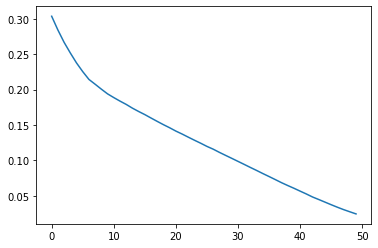

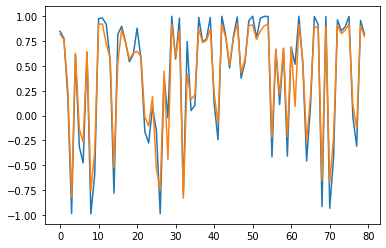

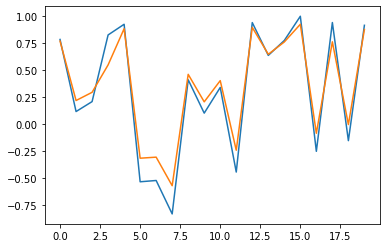

In [ ]:
GRU_model.compile(optimizer ='adam', loss = 'mse')
history = GRU_model.fit(train_X, train_y, epochs=50)
plt.plot(history.history['loss'])
plt.show()

train_y_hat = GRU_model.predict(train_X)
test_y_hat = GRU_model.predict(test_X)
plt.plot(train_y)
plt.plot(train_y_hat)
plt.show()
plt.plot(test_y)
plt.plot(test_y_hat)
plt.show()

### LAB 10-2 기억이 필요한 시퀀스를 예측해 보자

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

size, seq_len = 200, 30
# 비어있는 넘파이 배열을 생성한다.
# 이번에 생성할 데이터는 시퀀스에 인덱스가 있다
seq_X = np.empty(shape=(size, seq_len, 2))
Y = np.empty(shape=(size,))

In [ ]:
# sine 곡선에서 잘라낼 구간 설정
interval = np.linspace(0.0, 2.5, seq_len+1)

In [ ]:
shift = np.random.randn(size)
for i in range(size):  # 시퀀스 내의 각 원소에 대해 인덱스와 값을 설정
    seq_X[i,:,0] = np.random.randint(0, 6, size=(seq_len)) # 인덱스 
    seq_X[i,:,1] = np.sin(shift[i] + interval[:-1])        # 값 
    # label은 시퀀스 내에서 짝수 인덱스를 가진 원소의 값을 모두 더한 값
    even_idx = seq_X[i, seq_X[i,:,0]%2 == 0 ]
    Y[i] = even_idx[:,1].sum()

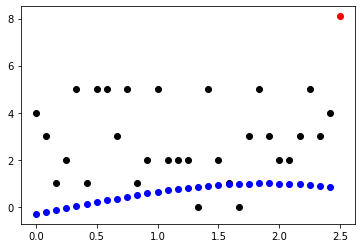

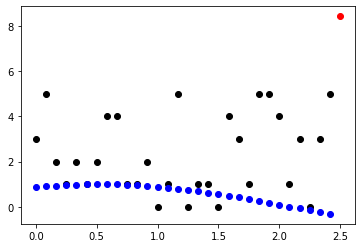

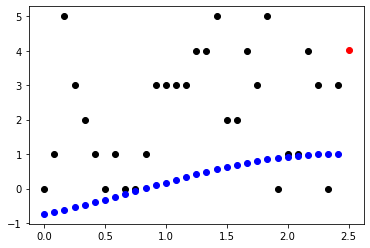

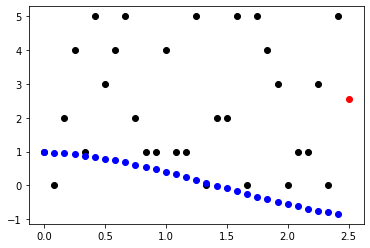

In [ ]:
for i in [1, 3, 5, 9]:
    plt.scatter(interval[:-1], seq_X[i, :, 0], color='k') # 인덱스 정보
    plt.scatter(interval[:-1], seq_X[i, :, 1], color='b') # 값: 사인 시퀀스
    plt.scatter(interval[-1], Y[i], color='r')
    plt.show()

In [ ]:
train_X = seq_X[:180]
train_y = Y[:180]
test_X = seq_X[180:]
test_y = Y[180:]

In [ ]:
import tensorflow as tf
simpleRNN_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 10, return_sequences=False,
                              input_shape=[seq_len, 2]),
    tf.keras.layers.Dense(1)
])
simpleRNN_model.compile(optimizer ='adam', loss = 'mse')
simpleRNN_model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 10)                130       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


Epoch 1/150
6/6 [==============================] - 1s 6ms/step - loss: 84.3470
Epoch 2/150
6/6 [==============================] - 0s 4ms/step - loss: 78.3227
Epoch 3/150
6/6 [==============================] - 0s 4ms/step - loss: 76.1052
Epoch 4/150
6/6 [==============================] - 0s 4ms/step - loss: 74.8089
Epoch 5/150
6/6 [==============================] - 0s 5ms/step - loss: 79.8833
Epoch 6/150
6/6 [==============================] - 0s 4ms/step - loss: 69.8928
Epoch 7/150
6/6 [==============================] - 0s 4ms/step - loss: 75.3521
Epoch 8/150
6/6 [==============================] - 0s 5ms/step - loss: 75.3009
Epoch 9/150
6/6 [==============================] - 0s 4ms/step - loss: 68.4405
Epoch 10/150
6/6 [==============================] - 0s 4ms/step - loss: 69.0284
Epoch 11/150
6/6 [==============================] - 0s 5ms/step - loss: 63.6347
Epoch 12/150
6/6 [==============================] - 0s 5ms/step - loss: 67.2787
Epoch 13/150
6/6 [==============================]

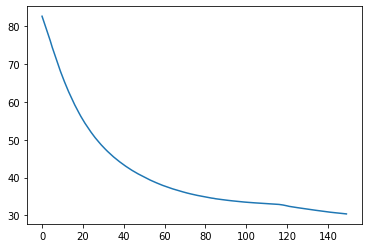

In [ ]:
history = simpleRNN_model.fit(train_X, train_y, epochs=150)
plt.plot(history.history['loss'])

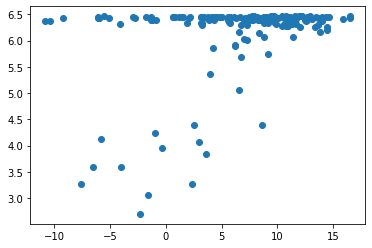

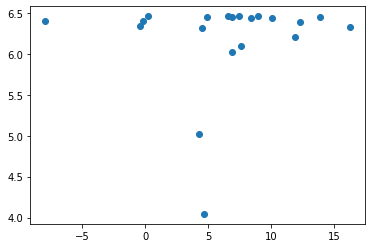

In [ ]:
train_y_hat = simpleRNN_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = simpleRNN_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

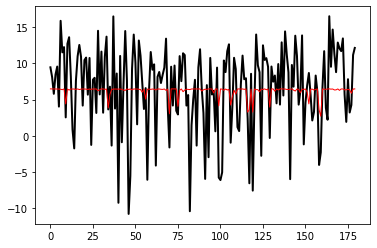

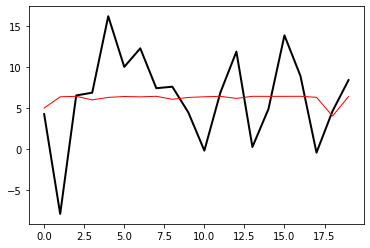

In [ ]:
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)

In [ ]:
LSTM_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 10, return_sequences=False,
                         input_shape=[seq_len, 2]),
    tf.keras.layers.Dense(1)
])

LSTM_model.compile(optimizer ='adam', loss = 'mse')
LSTM_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                520       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________


Epoch 1/150
6/6 [==============================] - 2s 11ms/step - loss: 73.7209
Epoch 2/150
6/6 [==============================] - 0s 8ms/step - loss: 71.9698
Epoch 3/150
6/6 [==============================] - 0s 8ms/step - loss: 71.2118
Epoch 4/150
6/6 [==============================] - 0s 11ms/step - loss: 69.6635
Epoch 5/150
6/6 [==============================] - 0s 9ms/step - loss: 63.7259
Epoch 6/150
6/6 [==============================] - 0s 8ms/step - loss: 62.2437
Epoch 7/150
6/6 [==============================] - 0s 9ms/step - loss: 64.2878
Epoch 8/150
6/6 [==============================] - 0s 9ms/step - loss: 57.5875
Epoch 9/150
6/6 [==============================] - 0s 9ms/step - loss: 54.6559
Epoch 10/150
6/6 [==============================] - 0s 8ms/step - loss: 53.2574
Epoch 11/150
6/6 [==============================] - 0s 8ms/step - loss: 53.0954
Epoch 12/150
6/6 [==============================] - 0s 8ms/step - loss: 52.9211
Epoch 13/150
6/6 [=============================

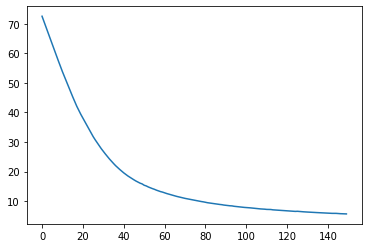

In [ ]:
history = LSTM_model.fit(train_X, train_y, epochs=150)
plt.plot(history.history['loss'])

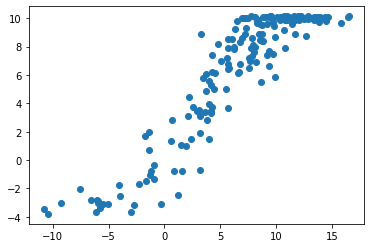

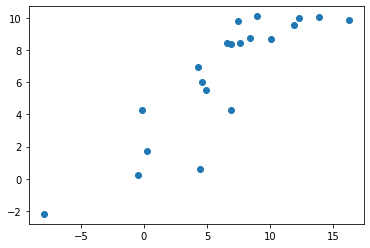

In [ ]:
train_y_hat = LSTM_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = LSTM_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

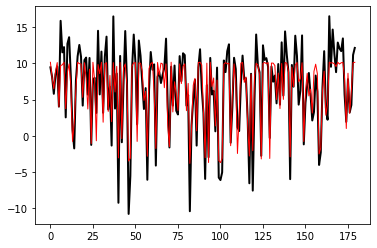

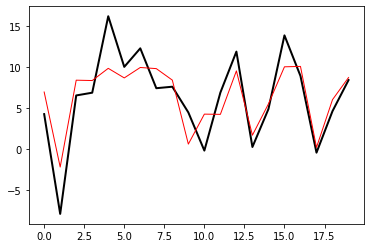

In [ ]:
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)

In [ ]:
GRU_model = tf.keras.Sequential([
    tf.keras.layers.GRU(units = 10, return_sequences=False, 
                        input_shape=[seq_len, 2]),
    tf.keras.layers.Dense(1)
])

In [ ]:
GRU_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 10)                420       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________


Epoch 1/150
6/6 [==============================] - 2s 10ms/step - loss: 90.8174
Epoch 2/150
6/6 [==============================] - 0s 9ms/step - loss: 85.4373
Epoch 3/150
6/6 [==============================] - 0s 11ms/step - loss: 88.5510
Epoch 4/150
6/6 [==============================] - 0s 11ms/step - loss: 79.2591
Epoch 5/150
6/6 [==============================] - 0s 13ms/step - loss: 79.6046
Epoch 6/150
6/6 [==============================] - 0s 11ms/step - loss: 80.0239
Epoch 7/150
6/6 [==============================] - 0s 10ms/step - loss: 76.1926
Epoch 8/150
6/6 [==============================] - 0s 10ms/step - loss: 78.8817
Epoch 9/150
6/6 [==============================] - 0s 9ms/step - loss: 73.4938
Epoch 10/150
6/6 [==============================] - 0s 10ms/step - loss: 71.7865
Epoch 11/150
6/6 [==============================] - 0s 10ms/step - loss: 72.1776
Epoch 12/150
6/6 [==============================] - 0s 9ms/step - loss: 73.6984
Epoch 13/150
6/6 [======================

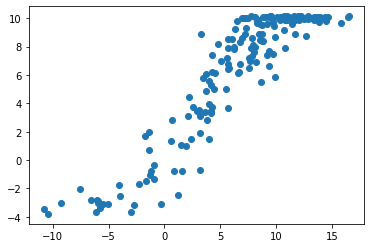

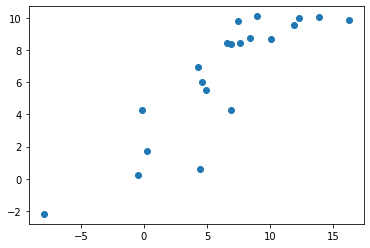

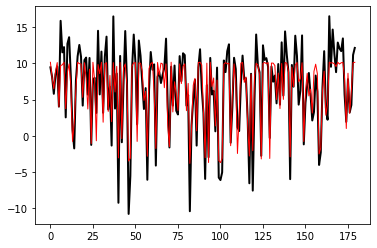

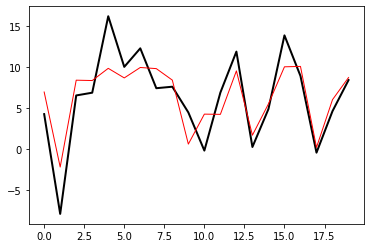

In [ ]:

GRU_model.compile(optimizer ='adam', loss = 'mse')
GRU_model.fit(train_X, train_y, epochs=150)
train_y_hat = LSTM_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = LSTM_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)